In [2]:
from typing_extensions import TypedDict

class State(TypedDict):
    graph_info:str


In [3]:
def weather_node(state:State):
    print("Chceking Weather...")
    return {"graph_info":state['graph_info']}

def sunny_node(state:State):
    return {"graph_info":state['graph_info']+" "+"It is sunny day, enjoy the sun"}

def rainy_node(state:State):
    return {"graph_info":state['graph_info']+" "+"It is rainy day, enjoy the rain"}



In [4]:
import random

from typing import Literal

def random_weather_node(state:State)->Literal['sunny_node','rainy_node']:
        graph_info = state['graph_info']

        if random.random()>0.5:
            return "sunny_node"
        else:
            return "rainy_node"

c:\MyCode\Visual Studio Code\LangGraph_IntroProject1\.venv\Lib\site-packages\langchain_core\_api\deprecation.py:25: UserWarning: Core Pydantic V1 functionality isn't compatible with Python 3.14 or greater.
  from pydantic.v1.fields import FieldInfo as FieldInfoV1


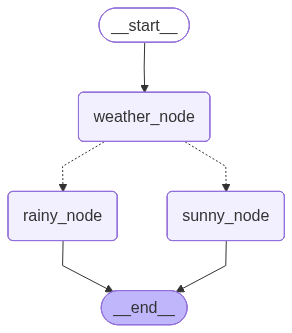

In [5]:
from langgraph.graph import StateGraph, START, END
from IPython.display import Image,display

graph = StateGraph(State)

graph.add_node('weather_node', weather_node)
graph.add_node('sunny_node', sunny_node)
graph.add_node('rainy_node', rainy_node)

graph.add_edge(START, 'weather_node')
graph.add_conditional_edges('weather_node', random_weather_node)
graph.add_edge('sunny_node', END)
graph.add_edge('rainy_node', END)

graph_builder = graph.compile()

display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [6]:
graph_builder.invoke({"graph_info": "Today's weather:"})

Chceking Weather...


{'graph_info': "Today's weather: It is rainy day, enjoy the rain"}